In [1]:
import pandas as pd
import GarminConnectETL

In [2]:
raw_df = pd.read_csv('/Users/antoniovillardaga/Documents/Python/Triathlon Python/Xavi Gallardo/Xavi Run 2022.csv')

In [3]:
raw_df.head(7)

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022-12-21 06:17:53,False,Miguel Hidalgo Running,9.73,753,00:49:08,161,188,4.0,...,0.0,0:00,No,00:13.05,21,0.0,00:48:42,01:20:54,"2,307","2,376"
1,Running,2022-12-14 06:24:45,False,Miguel Hidalgo Running,7.22,601,00:52:27,138,178,3.3,...,0.0,0:00,No,01:02.35,8,0.0,00:41:17,01:22:43,"2,282","2,325"
2,Running,2022-12-11 08:25:22,False,Miguel Hidalgo Running,15.02,"1,128",01:15:04,152,178,4.8,...,0.0,0:00,No,00:04.85,16,0.0,01:14:48,01:34:22,"2,230","2,285"
3,Running,2022-12-09 06:28:50,False,Miguel Hidalgo Running,6.57,524,00:35:35,143,170,3.3,...,0.0,0:00,No,03:21.62,7,0.0,00:35:20,01:09:17,"2,275","2,324"
4,Running,2022-12-07 07:03:57,False,Miguel Hidalgo Running,3.28,242,00:17:15,148,172,3.0,...,0.0,0:00,No,01:00.06,7,0.0,00:14:39,00:17:15,"2,288","2,310"
5,Running,2022-12-05 06:24:38,False,Miguel Hidalgo Running,16.32,"1,252",01:22:43,156,182,5.0,...,0.0,0:00,No,01:38.95,17,0.0,01:22:37,01:31:28,"2,267","2,338"
6,Running,2022-12-02 06:27:56,False,Miguel Hidalgo Running,11.01,857,00:54:45,158,183,4.5,...,0.0,0:00,No,00:03.19,12,0.0,00:54:43,01:05:09,"2,271","2,353"


In [4]:
cleaned_df = GarminConnectETL.clean_csv('/Users/antoniovillardaga/Documents/Python/Triathlon Python/Xavi Gallardo/Xavi Run 2022.csv')

In [5]:
cleaned_df.head(7)

,Activity Type,Date,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,...,Max Power,Avg. Swolf,Avg Stroke Rate,Min Temp,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022-12-21,9.73,753.0,49.0,161.0,188.0,4.0,160.0,212.0,...,758.0,0.0,0.0,0.0,21.0,0.0,48.0,80.0,2307.0,2376.0
1,Running,2022-12-14,7.22,601.0,52.0,138.0,178.0,3.3,118.0,226.0,...,640.0,0.0,0.0,0.0,8.0,0.0,41.0,82.0,2282.0,2325.0
2,Running,2022-12-11,15.02,1128.0,75.0,152.0,178.0,4.8,166.0,209.0,...,621.0,0.0,0.0,0.0,16.0,0.0,74.0,94.0,2230.0,2285.0
3,Running,2022-12-09,6.57,524.0,35.0,143.0,170.0,3.3,163.0,217.0,...,587.0,0.0,0.0,0.0,7.0,0.0,35.0,69.0,2275.0,2324.0
4,Running,2022-12-07,3.28,242.0,17.0,148.0,172.0,3.0,134.0,184.0,...,0.0,0.0,0.0,0.0,7.0,0.0,14.0,17.0,2288.0,2310.0
5,Running,2022-12-05,16.32,1252.0,82.0,156.0,182.0,5.0,168.0,176.0,...,0.0,0.0,0.0,0.0,17.0,0.0,82.0,91.0,2267.0,2338.0
6,Running,2022-12-02,11.01,857.0,54.0,158.0,183.0,4.5,163.0,200.0,...,0.0,0.0,0.0,0.0,12.0,0.0,54.0,65.0,2271.0,2353.0


In [10]:
ranges_df = GarminConnectETL.create_ranges(cleaned_df, 180, 400, 20, "Avg Pace", "Avg Stride Length", "Pace")

In [11]:
ranges_df

,Avg Pace,Avg Stride Length
1,3:20 - 3:40,1.50
2,3:40 - 4:00,1.52
3,4:00 - 4:20,1.42
4,4:20 - 4:40,1.32
5,4:40 - 5:00,1.25
6,5:00 - 5:20,1.20
7,5:20 - 5:40,1.15
8,5:40 - 6:00,1.11
9,6:00 - 6:20,1.02
10,6:20 - 6:40,0.99


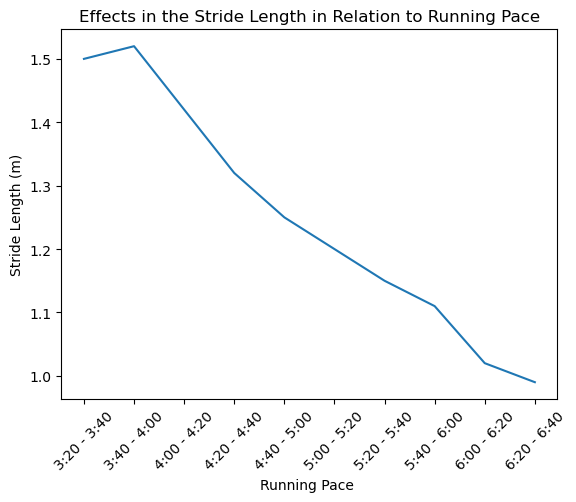

In [15]:
import matplotlib.pyplot as plt
plt.plot(ranges_df['Avg Pace'], ranges_df['Avg Stride Length'])
plt.xticks(rotation = 45)
plt.xlabel('Running Pace ')
plt.ylabel('Stride Length (m)')
plt.title('Effects in the Stride Length in Relation to Running Pace')
plt.show()